In [1]:
setwd('../')

#### Setup for severe - non-severe patients

In [2]:
phenotype <- "severe" # "severe" for severe-only analysis, "notsevere" for non-severe genes.

destfile= "Plots/Figure4_" #Directory destination and name of the csv and pdf files that will be retrieved as output.

 
#libraries needed:
library("AnnotationDbi")
library("AnnotationDbi")
library("org.Hs.eg.db")
library("igraph")

Loading required package: stats4
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which, which.max, which.min

Loading required package: Biobase
Welcome to Bioconductor

    Vignettes contain 

### Read Community structure output files from MolTi

In [3]:
cero <- readLines("data/MolTi/Community_Analysis/CommunitiesResolution0MultilayerNetwork5112018.csv")
cero <- strsplit(cero,"\t")
cerocinco <- readLines("data/MolTi/Community_Analysis/CommunitiesResolution05MultilayerNetwork5112018.csv")
cerocinco <- strsplit(cerocinco,"\t")
uno <- readLines("data/MolTi/Community_Analysis/CommunitiesResolution1MultilayerNetwork5112018.csv")
uno <- strsplit(uno,"\t")
unocinco <- readLines("data/MolTi/Community_Analysis/CommunitiesResolution15MultilayerNetwork5112018.csv")
unocinco <- strsplit(unocinco,"\t")
dos <- readLines("data/MolTi/Community_Analysis/CommunitiesResolution2MultilayerNetwork5112018.csv")
dos <- strsplit(dos,"\t")
doscinco <- readLines("data/MolTi/Community_Analysis/CommunitiesResolution25MultilayerNetwork5112018.csv")
doscinco <- strsplit(doscinco,"\t")
tres <- readLines("data/MolTi/Community_Analysis/CommunitiesResolution3MultilayerNetwork5112018.csv")
tres <- strsplit(tres,"\t")
trescinco <- readLines("data/MolTi/Community_Analysis/CommunitiesResolution35MultilayerNetwork5112018.csv")
trescinco <- strsplit(trescinco,"\t")
cuatro <- readLines("data/MolTi/Community_Analysis/CommunitiesResolution4MultilayerNetwork5112018.csv")
cuatro <- strsplit(cuatro,"\t")

In [4]:
lista_comunidades <- list(cero,cerocinco,uno,unocinco,dos,doscinco,tres,trescinco,cuatro)

#### Load  severe diagnosis for each patient

In [5]:
patients2 <- read.table(file= "data/MolTi/Community_Analysis/originalSevereDiagnosis.csv",sep= ",",header= F)
patients2[,1] <- as.character(patients2[,1])
patients2[,2] <- as.character(patients2[,2])
patients2 <- cbind(patients2,0)
patients2[,3] <- sample(patients2[,2])

In [6]:
head(patients2) # Column '0' are the randomized assignments

V1,V2,0
NEW0920,severe,severe
NEW0919,severe,notsevere
NEW0918,severe,severe
NEW0922,severe,notsevere
NEW0909,severe,severe
NEW0908,severe,notsevere


### Retrieve specific Compound Heterozygous Mutations for Severe & Non-severe groups

In [7]:
#Compound Heterozygous mutations
patients <- read.table(file= "data/InputGenes/compound_all_nov2018.csv")
patients[,1] <- as.character(patients[,1])
patients[,2] <- as.character(patients[,2])
patients <- split(patients[,2],patients[,1])
#severepatients <- patients[which(patients2[,3]=="severe")] #Uncomment and comment the next one for randomizing
severepatients <- patients[patients2[,1][which(patients2[,2]=="severe")]] ##Uncomment and comment the previous one for the original plot
#notseverepatients <- patients[which(patients2[,3]=="notsevere")] #Uncomment and comment the next one for randomizing
notseverepatients <- patients[patients2[,1][which(patients2[,2]=="notsevere")]] #Uncomment and comment the previous one for the original plot
severe<- unlist(severepatients)
names(severe) <- NULL
notsevere <- unlist(notseverepatients)
names(notsevere) <- NULL
severeonly <- setdiff(severe,notsevere)
notsevereonly <- setdiff(notsevere,severe)

severepatientsnames <- names(severepatients)
notseverepatientsnames <- names(notseverepatients)

In [8]:
head(patients)

$NEW0907
 [1] "ACAD10"       "AHNAK2"       "BMS1"         "C16orf71"     "CCDC171"     
 [6] "FBN2"         "FLG"          "Gene(Refseq)" "HLA-A"        "HYDIN"       
[11] "HYI"          "ITIH5"        "KIAA1919"     "LAMA5"        "MAP1A"       
[16] "MROH5"        "NOL8"         "PALD1"        "PMS2"         "RP1L1"       
[21] "SFI1"         "SLCO4A1"      "TCTE3"        "TLL2"         "TLR6"        
[26] "TMTC1"        "TTC3"         "ZNF469"      

$NEW0908
 [1] "AHNAK2"       "BAHCC1"       "BAIAP3"       "C2CD3"        "CFB"         
 [6] "COL15A1"      "FHAD1"        "FMN1"         "Gene(Refseq)" "HEATR1"      
[11] "LAMA2"        "MUC3A"        "MUC4"         "OR10G9"       "TDRD6"       
[16] "ZAN"         

$NEW0909
 [1] "AHNAK2"       "ANKRD12"      "CDH23"        "CES5A"        "CHGB"        
 [6] "ETV3L"        "FGL1"         "Gene(Refseq)" "GRIN3B"       "MCM8"        
[11] "MROH7"        "MYBPC2"       "MYH15"        "PLB1"         "SELO"        
[16] "TIAM1"        "TTN"          "ZNF273"      

$NEW0918
 [1] "C1orf94"      "CASP5"        "DMXL2"        "FHOD3"        "Gene(Refseq)"
 [6] "HSPG2"        "KIAA1109"     "LILRA1"       "LOXL3"        "LRP2"        
[11] "MUC17"        "MUC19"        "MUC3A"        "NAT8B"        "NOTCH4"      
[16] "SMTN"         "SRMS"         "UNC13C"       "ZP4"         

$NEW0919
 [1] "AHNAK2"       "BAHCC1"       "CRELD1"       "DNAH2"        "DNAH7"       
 [6] "FHOD3"        "Gene(Refseq)" "HSPG2"        "LEFTY2"       "MUC17"       
[11] "MUC19"        "NCKAP5L"      "NLRC5"        "NOTCH4"       "PRRT3"       
[16] "PTPN14"       "SMTN"         "SRMS"         "TOR2A"       

$NEW0920
 [1] "AGRN"         "AHNAK2"       "ANKRD18A"     "C1GALT1C1L"   "DIP2A"       
 [6] "DNAH2"        "ETV3L"        "FAM205A"      "FMN1"         "Gene(Refseq)"
[11] "KIF13B"       "KRT79"        "MICALL2"      "MUC5B"        "NKPD1"       
[16] "NPHP3"        "OBSCN"        "RAD51AP1"     "RP1"          "SLFN13"      
[21] "SNAP47"

### Retrieve specific Copy Number Variations for Severe & Non-severe groups

In [9]:
cnvdata <- read.csv("data/InputGenes/CNV_genes_for_iker.tsv",sep= "\t")
cnvdata[,"gene"] <- as.character(cnvdata[,"gene"])
genis <- c(cnvdata["gene"])$gene
genis <- mapIds(org.Hs.eg.db,keys = genis,column = "SYMBOL",keytype="ENSEMBL",multiVals = "first")
# Manual mapping for missing IDs
genis["ENSG00000005955"] <- "GGNBP2" 
genis["ENSG00000006114"] <- "SYNGR"
genis["ENSG00000108264"] <- "TADA2A"
genis["ENSG00000108270"] <- "AATF"
genis["ENSG00000108272"] <- "DHRS11"
genis["ENSG00000108278"] <- "ZNHI3"
genis["ENSG00000108753"] <- "HNF1B"
genis["ENSG00000129282"] <- "MRM1"
genis["ENSG00000132130"] <- "LHX1"
genis["ENSG00000141140"] <- "MYO19"
genis["ENSG00000141141"] <- "DDX52"
genis["ENSG00000161326"] <- "DUSP14"
genis["ENSG00000167230"] <- "C17orf78"
genis["ENSG00000174093"] <- "RP11-1407O15.2"
genis["ENSG00000184886"] <- "PIGW"
genis["ENSG00000197681"] <- "TBC1D3"
genis["ENSG00000203815"] <- "FAM231D"
genis["ENSG00000219492"] <- "RP11-1396O31.13"
genis["ENSG00000229924"] <- "FAM90A26"
genis["ENSG00000250913"] <- "USP17L23"
genis["ENSG00000268172"] <- "AL590452.1"
genis <- as.matrix(genis)
rownames(genis) <- NULL
genis <- genis[,1]
cnvdata <- cbind(cnvdata,genis)
severedata <- cnvdata[,c("gene","whole_gene",severepatientsnames,"genis")]
milddata <- cnvdata[,c("gene","whole_gene",notseverepatientsnames,"genis")]

'select()' returned 1:many mapping between keys and columns


In [10]:
severedata <- severedata[apply(X = severedata,MARGIN = 1,function(x) paste0(x[3:10],collapse='_')) != '2_2_2_2_2_2_2_2',]
head(severedata)

,gene,whole_gene,NEW0920,NEW0919,NEW0918,NEW0922,NEW0909,NEW0908,NEW0936,NEW0935,genis
4,ENSG00000042781,FALSE,2,2,2,2,2,2,1,2,USH2A
5,ENSG00000072401,FALSE,2,2,2,2,2,2,1,2,UBE2D1
7,ENSG00000100033,TRUE,2,2,2,2,2,2,2,3,PRODH
9,ENSG00000107018,TRUE,2,3,2,2,2,2,2,2,RLN1
26,ENSG00000151033,FALSE,1,2,2,2,2,2,2,2,LYZL2
28,ENSG00000160072,FALSE,2,1,1,2,2,2,2,2,ATAD3B


In [11]:
milddata <- milddata[apply(X = milddata,MARGIN = 1,function(x) paste0(x[3:10],collapse='_')) != '2_2_2_2_2_2_2_2',]
head(milddata)

,gene,whole_gene,NEW0921,NEW0931,NEW0907,NEW0923,NEW0930,NEW0929,NEW0928,NEW0927,NEW0932,NEW0934,NEW0933,NEW0937,genis
1,ENSG00000005955,TRUE,2,3,2,2,2,2,2,2,2,2,2,2,GGNBP2
2,ENSG00000006114,TRUE,2,3,2,2,2,2,2,2,2,2,2,2,SYNGR
3,ENSG00000038945,FALSE,2,1,2,2,2,2,2,2,2,2,2,2,MSR1
6,ENSG00000090857,FALSE,1,2,2,2,2,2,2,2,2,2,2,2,PDPR
7,ENSG00000100033,TRUE,2,2,3,2,2,2,3,2,2,2,2,2,PRODH
8,ENSG00000100033,TRUE,2,2,2,2,4,2,2,2,2,2,2,2,PRODH


In [12]:
rownames(severedata) <- NULL
rownames(milddata) <- NULL
severecnvs <- unique(as.character(severedata[,"genis"]))
mildcnvs <- unique(as.character(milddata[,"genis"]))
cnvsevereonly <- setdiff(severecnvs,mildcnvs)
cnvsnotsevereonly <- setdiff(mildcnvs,severecnvs)

In [13]:
cnvsevereonly

[1] "USH2A"   "UBE2D1"  "ATAD3B"  "TPCN2"   "AKNAD1"  "CLCNKB"  "CASP12" 
 [8] "PSG5"    "ZNF705B" "DEFB115" "ATAD3C"

### Load CMS Causal genes

In [14]:
cosa <- read.csv("data/InputGenes/cmsgenes.csv",header=FALSE) #http://www.musclegenetable.fr/4DACTION/Blob_groupe2
#cosa <- read.csv("data/InputGenes/genespaper.csv",header=FALSE) #Table PMID:30552423
cosa <- cosa[,1]
cosa <- as.character(cosa)
cosa

[1] "AGRN"    "ALG14"   "ALG2"    "CHAT"    "CHRNA1"  "CHRNB1"  "CHRND"  
 [8] "CHRNE"   "CHRNG"   "COL13A1" "COLQ"    "DOK7"    "DPAGT1"  "GFPT1"  
[15] "GMPPB"   "LAMA5"   "LAMB2"   "LRP4"    "MUSK"    "MYO9A"   "PLEC"   
[22] "PREPL"   "RAPSN"   "RPH3A"   "SCN4A"   "SLC18A3" "SLC25A1" "SLC5A7" 
[29] "SNAP25"  "SYT2"    "UNC13B"  "VAMP1"

In [15]:
severeonly2 <- data.frame(severeonly)
cosa2 <- data.frame(cosa)
cnvsevereonly2 <- data.frame(cnvsevereonly)
notsevereonly2 <- data.frame(notsevereonly)
notcnvsevereonly2 <- data.frame(cnvsnotsevereonly)


severeonly2[,2] <- 'CHVsevereonly'
cosa2[,2] <- 'causal'
cnvsevereonly2[,2] <- 'CNVsevereonly'
notsevereonly2[,2] <- 'CHVnotsevereonly'
notcnvsevereonly2[,2] <- 'CNVsnotsevereonly'

#For Cytoscape plots
write.table(rbind(as.matrix(severeonly2),as.matrix(cnvsevereonly2),as.matrix(cosa2)),file='Cytoscape_Session/SevereMetadata_Figure4_Supp_Fig_6.csv',sep='csv',quote=F,row.names = F,col.names = F)
write.table(rbind(as.matrix(notsevereonly2),as.matrix(notcnvsevereonly2),as.matrix(cosa2)),file='Cytoscape_Session/NOTSevereMetadata_Figure4_Supp_Fig_6.csv',sep='csv',quote=F,row.names = F,col.names = F)


### Join causal and mutated genes

In [16]:
# Setup depending on severity groups
if(phenotype == "severe"){
  algenes <- c(severeonly,cosa,cnvsevereonly) #Severe-Only Analysis 
}
if(phenotype == "notsevere"){
  algenes <- c(notsevereonly,cosa,cnvsnotsevereonly) #To get a Mild-Only  Analysis
}

In [17]:
# Solve some missing gene mappings
if("KIAA1919" %in% algenes){
  algenes <- replace(algenes,algenes== "KIAA1919","MFSD4B")
}
if("FAM188B" %in% algenes){
  algenes <- replace(algenes,algenes== "FAM188B","MINDY4")
}
if("C14orf159" %in% algenes){
  algenes <- replace(algenes,algenes== "C14orf159","DGLUCY")
}
if("C1orf168" %in% algenes){
  algenes <- replace(algenes,algenes== "C1orf168","FYB2")
}
if("IKBKAP" %in% algenes){
  algenes <- replace(algenes,algenes== "IKBKAP","ELP1")
}
if("SYNGR" %in% algenes){
  algenes <- replace(algenes,algenes== "SYNGR","SYNGR1")
}
if("ZNHI3" %in% algenes){
  algenes <- replace(algenes,algenes== "ZNHI3","ZNHIT3")
}
if("FAM231D" %in% algenes){
  algenes <- replace(algenes,algenes== "FAM231D","LINC01145")
}
if("SELO" %in% algenes){
  algenes <- replace(algenes,algenes== "SELO","SELENOO")
}
if("MFSD7" %in% algenes){
  algenes <- replace(algenes,algenes== "MFSD7","SLC49A3")
}

#Convert to entrez
algenes2 <- algenes
algenes <- mapIds(org.Hs.eg.db,keys = algenes,column = "ENTREZID",keytype="SYMBOL",multiVals = "first")
names(algenes) <- NULL

'select()' returned 1:1 mapping between keys and columns


### Create a table with the community ID of each gene in 'genescausales' vector.

In [18]:
genescausales <- mapIds(org.Hs.eg.db,keys = algenes2,column = "ENTREZID",keytype="SYMBOL",multiVals = "first")
  genescausales <- as.matrix(genescausales)
  rownames(genescausales) <- NULL
  genescausales <- genescausales[,1]
  genescausales <- unlist(genescausales) #need this unlist as sometimes R does not create a c() vector with the previous line
  disease <- genescausales
  res <- matrix(nrow= length(disease),ncol= 9)
  rownames(res) <- disease

#Remove genes not present on Multilayer network
curl <- lapply(as.list(genescausales),function(x) which(sapply(cuatro, function(y) x %in% y)))
res <- res[!unlist(lapply(curl,function(x) length(x)==0)),]

'select()' returned 1:1 mapping between keys and columns


In [19]:
head(res)

375790,NA,NA,NA,NA,NA,NA,NA,NA,NA
23181,NA,NA,NA,NA,NA,NA,NA,NA,NA
23303,NA,NA,NA,NA,NA,NA,NA,NA,NA
338785,NA,NA,NA,NA,NA,NA,NA,NA,NA
79778,NA,NA,NA,NA,NA,NA,NA,NA,NA
27031,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [20]:
dim(res)

[1] 124   9

In [21]:
for(i in 1:9){
  current <- unlist(lapply(as.list(rownames(res)),function(x) which(sapply(lista_comunidades[[i]], function(y) x %in% y))))
  res[,i] <- current
}

In [22]:
head(res)

375790,2,5,7,53,51,342,454,573,492
23181,2,5,6,11,51,225,142,220,298
23303,2,3,7,76,153,40,38,54,75
338785,2,1,6,11,142,225,142,220,298
79778,2,5,7,60,54,24,30,46,702
27031,2,3,6,11,142,225,38,331,506


###  Generate Figure 4 graph (+ input graph for Cytoscape)

In [23]:
library(parallelDist)
library(reshape2)

In [24]:
melted_dist <- as.matrix(parallelDist(res,'hamming',threads = 7)*9)
diag(melted_dist) <- NA
melted_dist[lower.tri(melted_dist)] <- NA
head(melted_dist)

,375790,23181,23303,338785,79778,27031,10635,6101,56171,80206,...,7399,7321,83858,219931,254268,1188,100506742,5673,245929,219293
375790,NA,6,7,8,6,8,8,6,8,8,...,0,8,6,7,7,7,8,1,7,8
23181,NA,NA,8,2,7,5,8,7,8,8,...,6,8,7,7,7,7,8,6,7,8
23303,NA,NA,NA,8,7,6,6,7,1,7,...,7,7,7,8,8,8,7,7,8,7
338785,NA,NA,NA,NA,8,4,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8
79778,NA,NA,NA,NA,NA,8,8,5,8,8,...,6,8,6,7,6,7,8,6,7,8
27031,NA,NA,NA,NA,NA,NA,7,8,6,7,...,8,7,8,8,8,8,7,8,8,7


In [25]:
rownames(melted_dist) <- mapIds(org.Hs.eg.db,keys = rownames(melted_dist),column = "SYMBOL",keytype="ENTREZID",multiVals = "first")
colnames(melted_dist) <- rownames(melted_dist)

'select()' returned 1:1 mapping between keys and columns


In [26]:
melted_dist <- melt(melted_dist)
write.table(melted_dist[!is.na(melted_dist[,3]),],file='data/Figure3_input.csv',row.names = F,col.names = T,quote=F,sep=',') #Input for Figure 3 plots in Cytoscape!
melted_dist <- melted_dist[melted_dist[,3]==0,] # Get pairs that are always together trough resolution
melted_dist <- na.omit(melted_dist)
dim(melted_dist)

[1] 158   3

In [27]:
head(melted_dist)

,Var1,Var2,value
1241,AGRN,HSPG2,0
2977,AGRN,LOXL3,0
2987,HSPG2,LOXL3,0
3370,DMXL2,UNC13C,0
5085,AGRN,TNXB,0
5095,HSPG2,TNXB,0


In [28]:
g=simplify(graph_from_edgelist(as.matrix(melted_dist[,1:2]),directed = F))
g

IGRAPH 585bd42 UN-- 59 143 -- 
+ attr: name (v/c)
+ edges from 585bd42 (vertex names):
 [1] AGRN --HSPG2   AGRN --LOXL3   AGRN --TNXB    AGRN --VCAN    AGRN --CHGB   
 [6] AGRN --COL15A1 AGRN --LAMA2   AGRN --TNC     AGRN --COL13A1 AGRN --LAMA5  
[11] AGRN --LAMB2   AGRN --LRP4    AGRN --PLEC    AGRN --USH2A   HSPG2--LOXL3  
[16] HSPG2--TNXB    HSPG2--VCAN    HSPG2--CHGB    HSPG2--COL15A1 HSPG2--LAMA2  
[21] HSPG2--TNC     HSPG2--COL13A1 HSPG2--LAMA5   HSPG2--LAMB2   HSPG2--LRP4   
[26] HSPG2--PLEC    HSPG2--USH2A   LOXL3--TNXB    LOXL3--VCAN    LOXL3--CHGB   
[31] LOXL3--COL15A1 LOXL3--LAMA2   LOXL3--TNC     LOXL3--COL13A1 LOXL3--LAMA5  
[36] LOXL3--LAMB2   LOXL3--LRP4    LOXL3--PLEC    LOXL3--USH2A   DMXL2--UNC13C 
+ ... omitted several edges

In [29]:
components(g)

$membership
    AGRN    HSPG2    LOXL3    DMXL2   UNC13C     TNXB     VCAN     LRP2 
       1        1        1        2        2        1        1        3 
  VWA5B2     CHGB RAD51AP1     MCM8     SMTN    MYH15   ZNF778   ZNF273 
       3        1        4        4        5        5        6        6 
  BAIAP3    DNAH7    C2CD3   LILRA1      CFB  COL15A1    RPL3L   HEATR1 
       2        7        7        8        8        1        9        9 
   LAMA2   DNAAF1     SRMS   DNAH17 SIGLEC12      TNC    CDH23     CDH3 
       1        7       10       10        8        1       11       11 
   KRT79     RPTN   CHRNA1   CHRNB1    CHRND    CHRNE    CHRNG  COL13A1 
      12       12       13       13       13       13       13        1 
   ALG14   DPAGT1    LAMA5    LAMB2     LRP4    TIAM1    MYO9A     PLEC 
      14       14        1        1        1       15       15        1 
 SLC28A1   SLC5A7     SYT2   UNC13B    USH2A   WDSUB1   UBE2D1    TPCN2 
      16       16        3        2        1       17       17       18 
  CLCNKB    CASP5   CASP12 
      18       19       19 

$csize
 [1] 15  4  3  2  2  2  3  3  2  2  2  2  5  2  2  2  2  2  2

$no
[1] 19

In [30]:
layouts <- grep("^layout_", ls("package:igraph"), value=TRUE)[-1]
layouts

[1] "layout_as_bipartite"  "layout_as_star"       "layout_as_tree"      
 [4] "layout_components"    "layout_in_circle"     "layout_nicely"       
 [7] "layout_on_grid"       "layout_on_sphere"     "layout_randomly"     
[10] "layout_with_dh"       "layout_with_drl"      "layout_with_fr"      
[13] "layout_with_gem"      "layout_with_graphopt" "layout_with_kk"      
[16] "layout_with_lgl"      "layout_with_mds"      "layout_with_sugiyama"

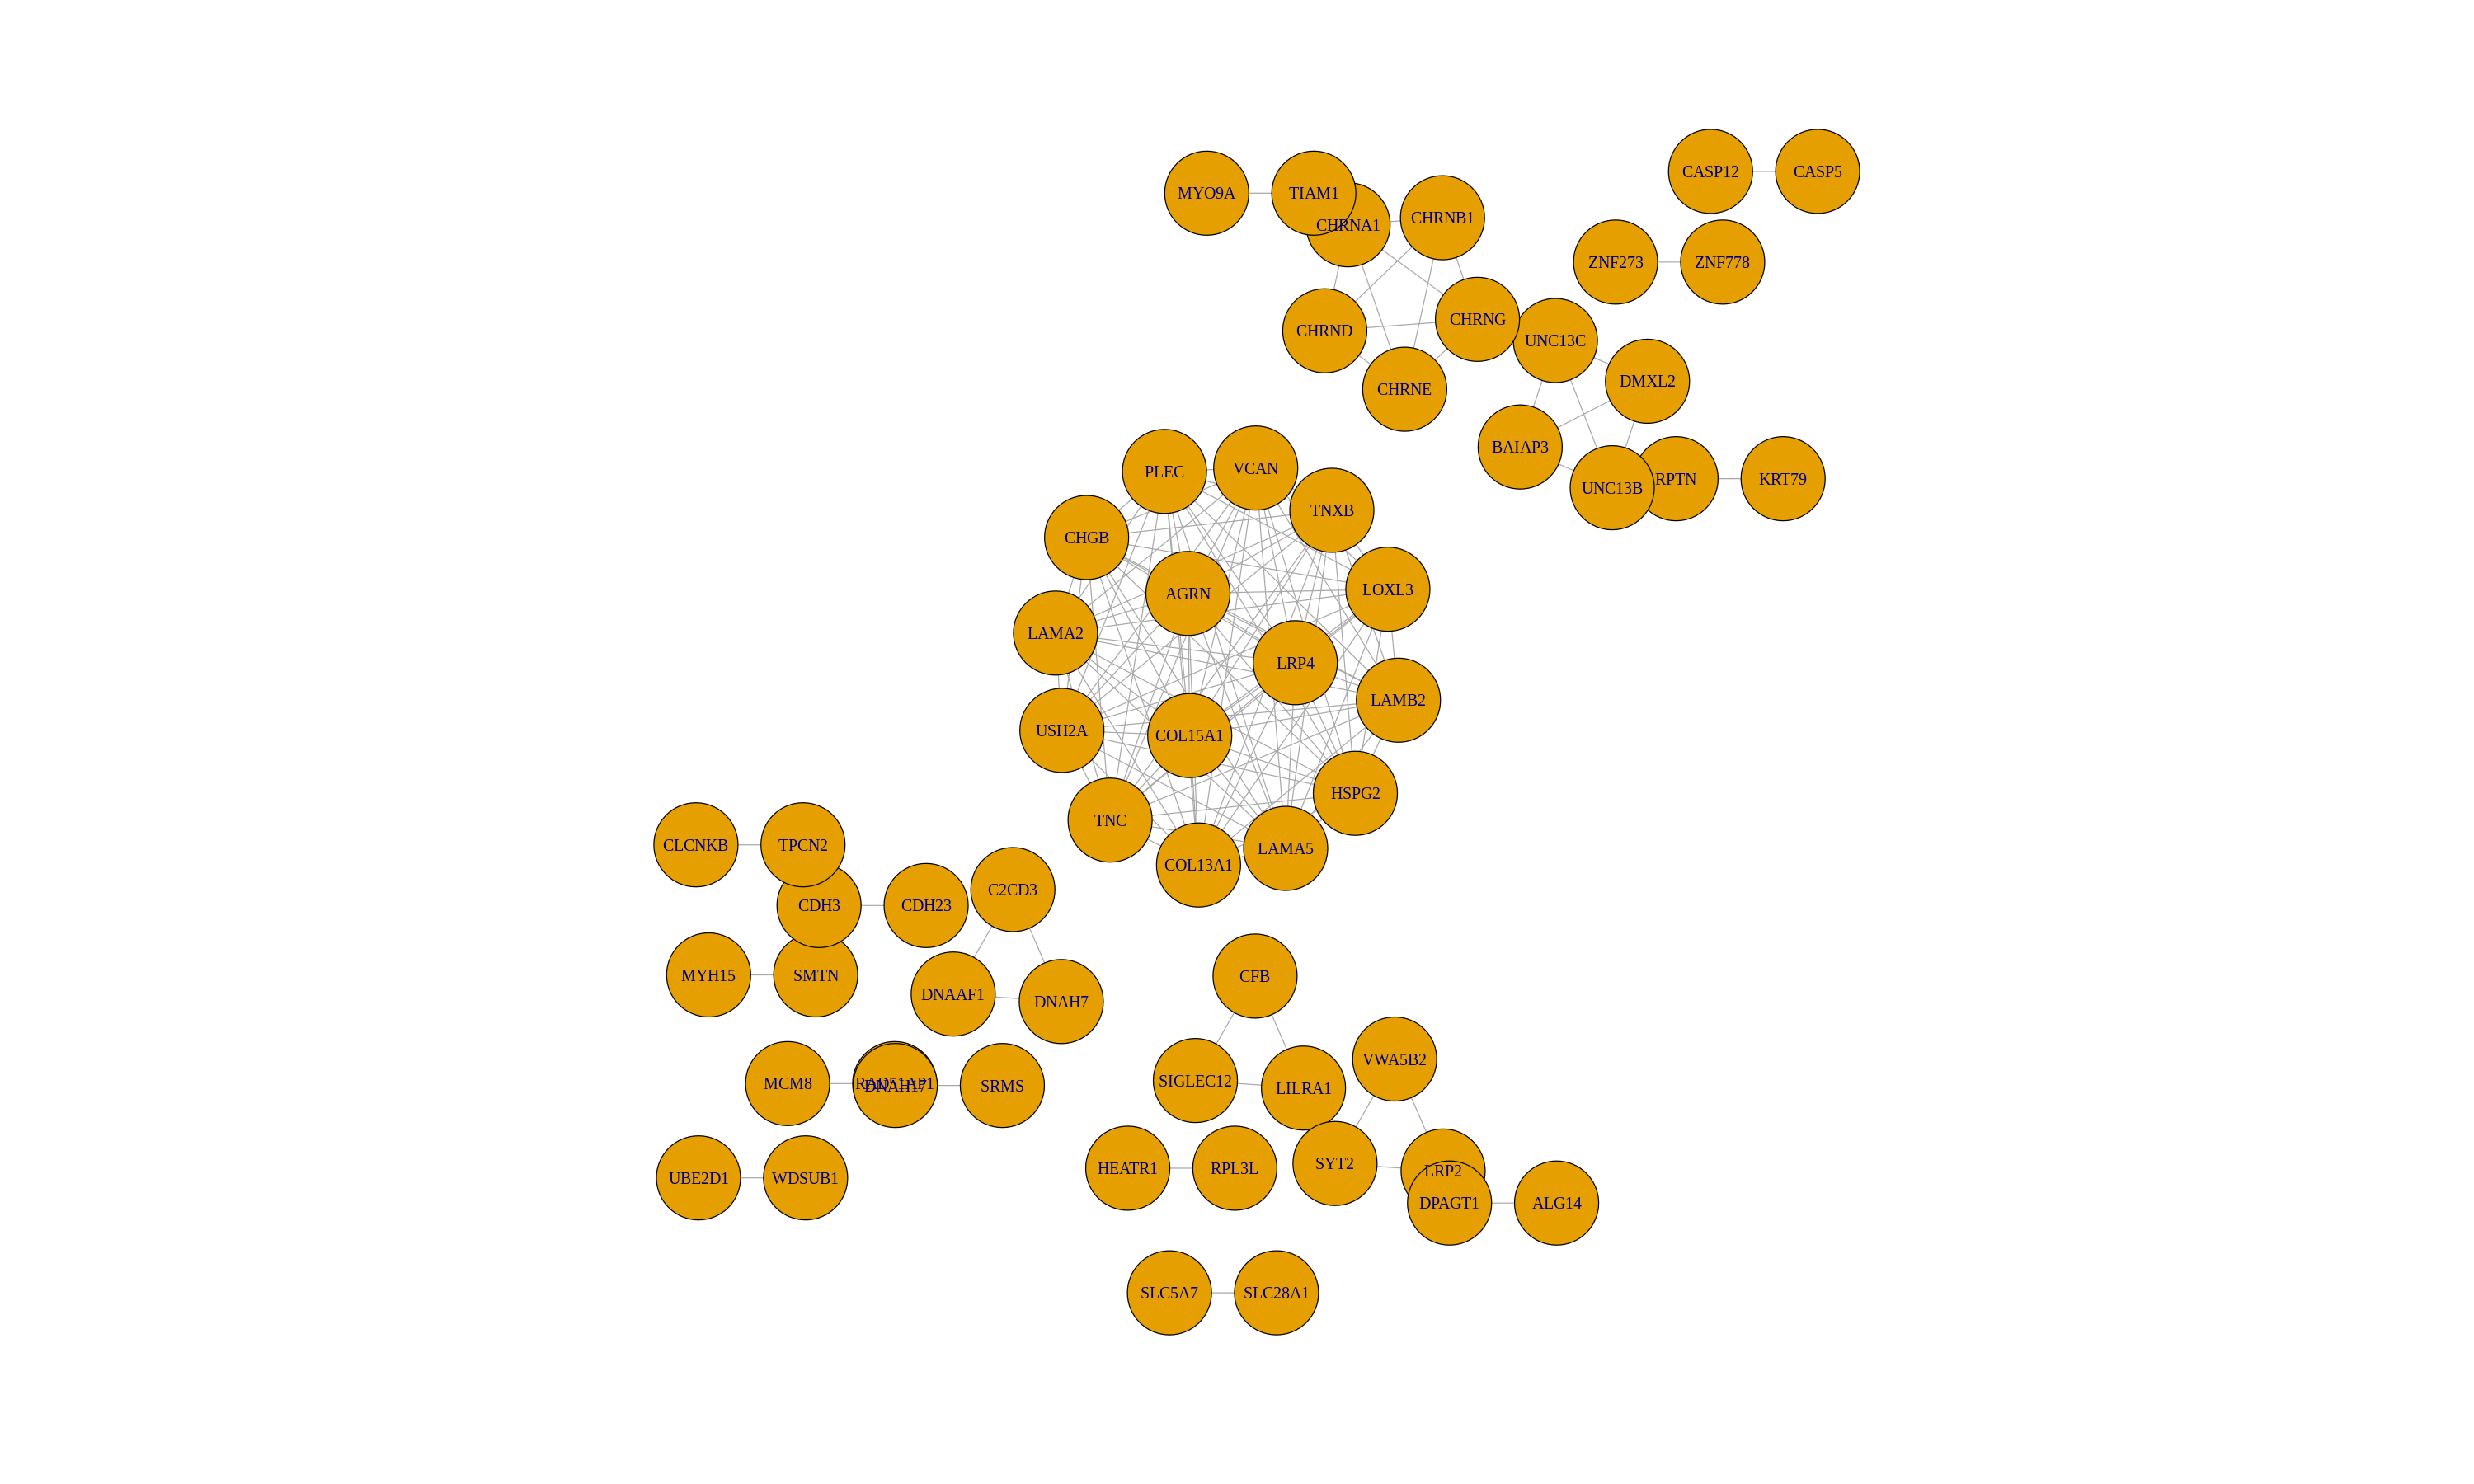

In [31]:
#test.layout <- layout_components(g,weight.edge.lengths = edge_density(g)/100)
options(repr.plot.width=25, repr.plot.height=15)
set.seed(2020) #seed for layout
plot(g, layout = layout_components)

#### Write CSV file for plotting with Cytoscape (Figure 4)

In [32]:
write.csv(x= as_edgelist(g),file= paste0(destfile,phenotype,".csv"),row.names=FALSE) 